In [1]:
%matplotlib inline

In [2]:
from src.utils.load_processed_data import load_wine
from src.naive_bayes import (NaiveBayes, 
                             GaussianNaiveBayes, 
                             MixedNaiveBayes)
from src.evaluators import MetricsEvaluator
from src.digitisers import (MultipleAttributeTransformer,
                            RoundDigitizer, KMeansDigitizer,
                            DiscreteEncoder)
from src.cross_validation import CrossValidator

In [3]:
import pandas as pd
import numpy as np
import seaborn as sbn
from matplotlib import pyplot as plt

# Wine

In [4]:
X, Y = load_wine()

In [5]:
transformers = {i: None for i in range(X.shape[1])}
transformer = lambda: MultipleAttributeTransformer(transformers)

In [6]:
cv = CrossValidator(X, Y, lambda: GaussianNaiveBayes(), transformer)

In [7]:
nb_folds = 10
mevs = cv.kfold_cross_validation(nb_folds, shuffle=True)

df = pd.DataFrame(index = ['Fold_'+str(f) for f in range(nb_folds)]) 
                  #index=['Accuracy','Precision','Recall','F Measure'])

df['Accuracy'] = np.asarray([m.accuracy() for m in mevs])#.mean()
df['Precision'] = np.asarray([m.precision() for m in mevs])#.mean()
df['Recall'] = np.asarray([m.recall() for m in mevs])#.mean()
df['F Measure'] = np.asarray([m.f_measure() for m in mevs])#.mean()
df
#print(np.asarray([m.confusion_matrix() for m in mevs]))

,Accuracy,Precision,Recall,F Measure
Fold_0,0.722222,0.861111,0.722222,0.722222
Fold_1,0.722222,0.895833,0.722222,0.739057
Fold_2,0.888889,0.911111,0.888889,0.888568
Fold_3,0.888889,0.913580,0.888889,0.890222
Fold_4,0.944444,0.953704,0.944444,0.945336
Fold_5,0.611111,0.629630,0.611111,0.561616
Fold_6,0.722222,0.895833,0.722222,0.746180
Fold_7,0.777778,0.904762,0.777778,0.804430
Fold_8,0.823529,0.876471,0.823529,0.823134
Fold_9,0.941176,0.952941,0.941176,0.940243


In [8]:
df.describe().query("index in ['mean','std','min','max']")

,Accuracy,Precision,Recall,F Measure
mean,0.804248,0.879498,0.804248,0.806101
std,0.111201,0.092505,0.111201,0.118530
min,0.611111,0.629630,0.611111,0.561616
max,0.944444,0.953704,0.944444,0.945336


In [9]:
print(np.asarray([m.confusion_matrix() for m in mevs]))

[[[3 0 0]
  [0 5 5]
  [0 0 5]]

 [[5 0 0]
  [0 5 5]
  [0 0 3]]

 [[5 0 1]
  [0 3 1]
  [0 0 8]]

 [[4 0 1]
  [0 5 1]
  [0 0 7]]

 [[8 1 0]
  [0 5 0]
  [0 0 4]]

 [[5 1 0]
  [4 2 2]
  [0 0 4]]

 [[6 0 1]
  [0 4 4]
  [0 0 3]]

 [[4 0 1]
  [0 7 3]
  [0 0 3]]

 [[3 0 1]
  [0 4 2]
  [0 0 7]]

 [[9 0 0]
  [0 3 1]
  [0 0 4]]]


In [10]:
print(np.asarray([m.confusion_matrix() for m in mevs]).sum(axis=0))

[[52  2  5]
 [ 4 43 24]
 [ 0  0 48]]


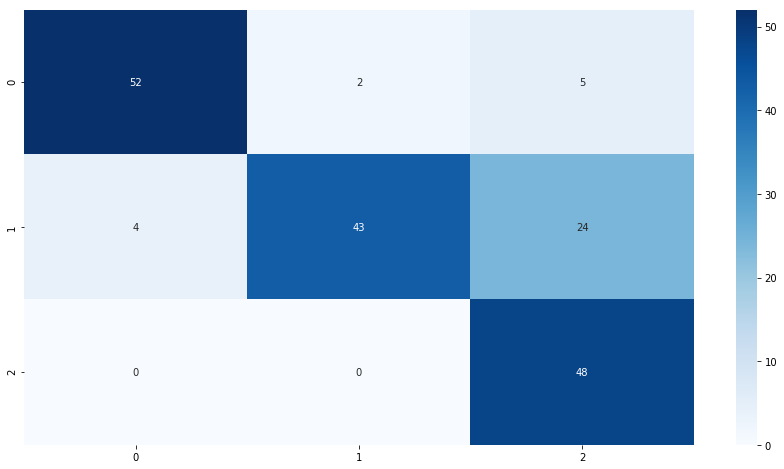

In [12]:
plt.figure(figsize=(15,8))
sbn.heatmap(np.asarray([m.confusion_matrix() for m in mevs]).sum(axis=0), annot=True, cmap='Blues')

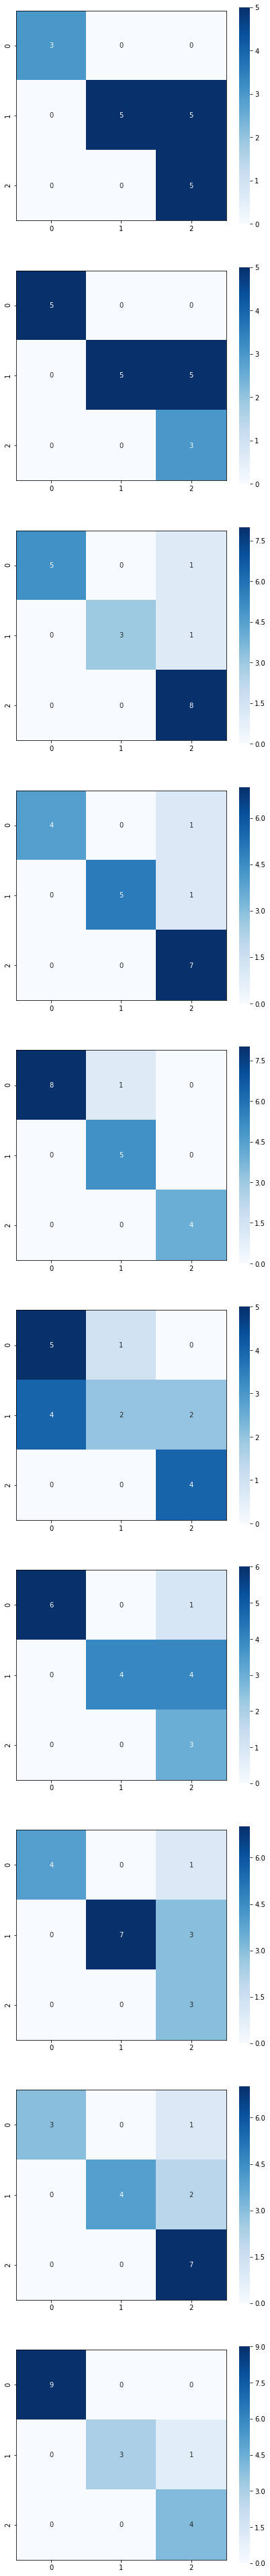

In [32]:
fig, ax = plt.subplots(ncols=1, nrows=len(mevs), figsize=(7, 7*len(mevs)))
for i, mev in enumerate(mevs):
    a = sbn.heatmap(mev.confusion_matrix(), annot=True, ax=ax[i], cmap='Blues', square=True)
    for _, spine in a.spines.items():
        spine.set_visible(True)
        